<a href="https://colab.research.google.com/github/vasiliyeskin/MachineLearningExperiences/blob/master/transfer_learning/cats_and_dogs_vgg16_visualisationOfCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Визуализация сверточных нейросетей**

In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


In [2]:
!wget https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/transfer_learning/cat.jpg -O cat.jpg

--2020-08-06 13:43:34--  https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/transfer_learning/cat.jpg
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vasiliyeskin/MachineLearningExperiences/master/transfer_learning/cat.jpg [following]
--2020-08-06 13:43:35--  https://raw.githubusercontent.com/vasiliyeskin/MachineLearningExperiences/master/transfer_learning/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68880 (67K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  67.27K  --.-KB/s    in 0.01s   

2020-08-06 13:43:35 (5.93 MB/s) - ‘cat.jpg’ s

**Выбираем фото для демонстрации**

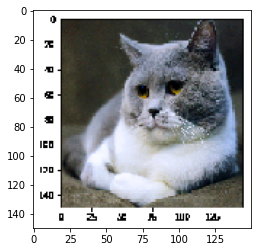

In [3]:
image_file_name = 'cat.jpg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

**Преобразуем фотографию в массив numpy**

In [4]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# **Загружаем предварительно обученную нейронную сеть**

Закачиваем файл с обученной моделью

In [5]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fy3tiU1hXN-xCopdHzcRwWDsIggySuVa' -O my_cats_vs_dogs_cnn.h5
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fy3tiU1hXN-xCopdHzcRwWDsIggySuVa' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Fy3tiU1hXN-xCopdHzcRwWDsIggySuVa" -O my_cats_vs_dogs_cnn.h5 && rm -rf /tmp/cookies.txt

--2020-08-06 13:43:56--  https://docs.google.com/uc?export=download&confirm=0ThG&id=1Fy3tiU1hXN-xCopdHzcRwWDsIggySuVa
Resolving docs.google.com (docs.google.com)... 64.233.184.101, 64.233.184.138, 64.233.184.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.184.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-48-docs.googleusercontent.com/docs/securesc/8f6ai2geg45589a7ofpqjelk091vi9fl/8l489nnba8rsbhq23vong963dfb3a2hq/1596721425000/10428453468239587399/10991991393956184422Z/1Fy3tiU1hXN-xCopdHzcRwWDsIggySuVa?e=download [following]
--2020-08-06 13:43:56--  https://doc-14-48-docs.googleusercontent.com/docs/securesc/8f6ai2geg45589a7ofpqjelk091vi9fl/8l489nnba8rsbhq23vong963dfb3a2hq/1596721425000/10428453468239587399/10991991393956184422Z/1Fy3tiU1hXN-xCopdHzcRwWDsIggySuVa?e=download
Resolving doc-14-48-docs.googleusercontent.com (doc-14-48-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting

Загружаем модель в память

In [6]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [10]:
vgg16_net.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fa5904c80b8>>

In [10]:
loaded_model = load_model('my_cats_vs_dogs_cnn.h5')

In [15]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

**"Обрезаем" модель на нужном слое**

In [16]:
# Номера сверточных слоев - 0, 3, 6
activation_model = Model(inputs=vgg16_net.input, outputs=vgg16_net.layers[2].output)

In [17]:
activation_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## **Запускаем изображение в обрезанную модель**

In [18]:
activation = activation_model.predict(img_array)

In [19]:
print(activation.shape)

(1, 150, 150, 64)


## **Показываем результаты работы модели**

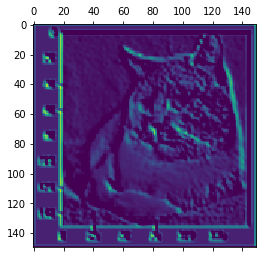

In [20]:
plt.matshow(activation[0, :, :, 13], cmap='viridis')

## **Печатаем вывод всех карт признаков**

In [21]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [22]:
display_grid = np.zeros((n_cols * size, images_per_row * size))

In [23]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

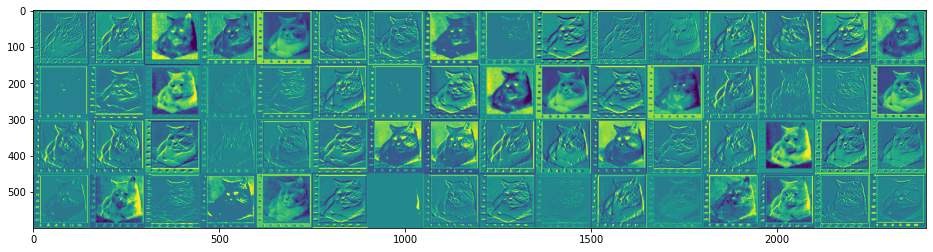

In [24]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

# **Сравнение результатов, выдаваемых выходным каскадом VGG16 и ранее обученной сетью на тонких настройках**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


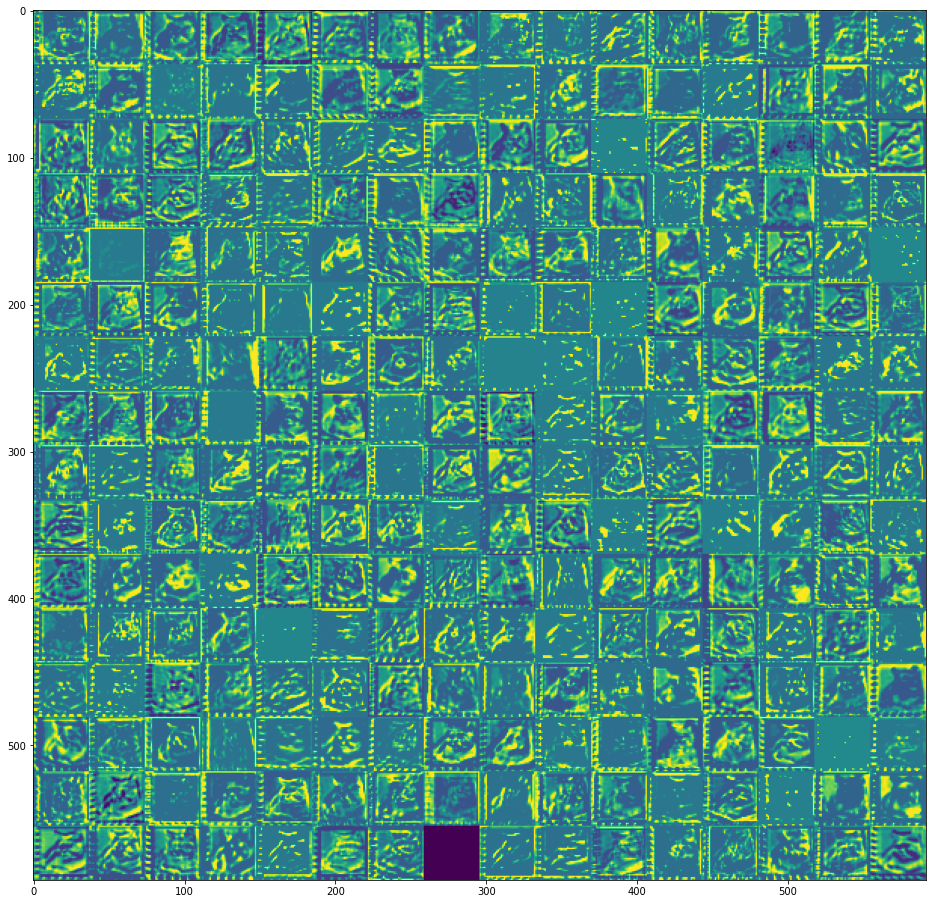

In [25]:
#### VGG16
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
activation_model = Model(inputs=vgg16_net.input, outputs=vgg16_net.layers[8].output)
activation = activation_model.predict(img_array)

images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row
display_grid = np.zeros((n_cols * size, images_per_row * size))


for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
### предобученная сеть с тонкими настройками
loaded_model = load_model('my_cats_vs_dogs_cnn.h5')
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[0].output)
activation = activation_model.predict(img_array)

images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row
display_grid = np.zeros((n_cols * size, images_per_row * size))


for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')